In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import f90nml as f90 
import os
import sys
sys.path.insert(0,os.getcwd()+'/plasma')
#import plasma
#import equilibrium_process as eqdsk
%matplotlib inline
from utils.AORSA_Analysis import Aorsa_Analysis


In [5]:
# Local Directories 
workdir = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/" # home ws
eqdsk_file = workdir + 'g147634.04525'

print(workdir)
print(eqdsk_file)

# Perlmutter directories 
host = 'perlmutter' #'perlmutter.nersc.gov'
username = 'vandelij'
perlmutter_path_to_case = '~/aorsa3/aorsa/jacob_local/shots/DIIID147634/'  #'~/aorsa2/examples/aorsa_cql3d_init/'



/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/
/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/g147634.04525


In [6]:
# plt.figure(figsize=(10, 10))
# eq0,fig0=eqdsk.readGEQDSK(eqdsk_file,doplot=False)
# print(eq0.keys())

In [7]:
# print(eq0['fpol'].shape)

In [8]:
# #Plot the equilibrium to view 
# r = eq0['r']
# z = eq0['z']
# psizr = eq0['psizr']
# plt.figure(figsize=(4, 8))
# plt.axis('equal')
# img = plt.contour( r, z, psizr.T, levels=np.append(np.linspace(-.4, -0.2, 40), np.linspace(-.19, 0.2, 20) ))
# plt.plot(eq0['rlim'], eq0['zlim'], color='black', linewidth=3)
# plt.plot(eq0['rbbbs'], eq0['zbbbs'], color='black', linewidth=3)
# plt.colorbar(img)
# idx=61
# plt.scatter(eq0['rlim'][idx], eq0['zlim'][idx])#, color='black', linewidth=3)
# print(eq0['rlim'][idx])
# save_points = np.zeros((eq0['rlim'].shape[0], 3))
# save_points[:,0] = eq0['rlim']
# save_points[:,1] = eq0['zlim']
# np.savetxt('DIIIDwall.txt', save_points)

In [9]:
# Section for reading in the genray density profiles 
gnr_input_path = workdir + '/genray.in'
gnr_nml = f90.read(gnr_input_path)


/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/aorsa_env/lib/python3.8/site-packages/f90nml/parser.py:826: UserWarning: f90nml: warning: Value 0.0 is not assigned to any variable and has been removed.
  warnings.warn(
/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/aorsa_env/lib/python3.8/site-packages/f90nml/parser.py:826: UserWarning: f90nml: warning: Value 5e+18 is not assigned to any variable and has been removed.
  warnings.warn(
/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/aorsa_env/lib/python3.8/site-packages/f90nml/parser.py:826: UserWarning: f90nml: warning: Value 1e+16 is not assigned to any variable and has been removed.
  warnings.warn(
/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/aorsa_env/lib/python3.8/site-packages/f90nml/parser.py:826: UserWarning: f90nml: warning: Value 7e+18 is not assigned to any variable and has been removed.
  warnings.warn(
/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/aorsa_env/lib/python3.8/site-packages/f90nml/parser.py:826: UserWarning: f90nml: warn

In [19]:
w = 2*np.pi*96e6
fast_density_factor = 0.05
c = 3e8
npar = 5 # 6
R = 1.12
nphi = R*w*npar/c
print(nphi)

npar2 = 5*c/(R*w)
print(npar2)


11.25946807046582
2.2203535587597005


Text(0.5, 1.0, 'Genray Shot Profiles')

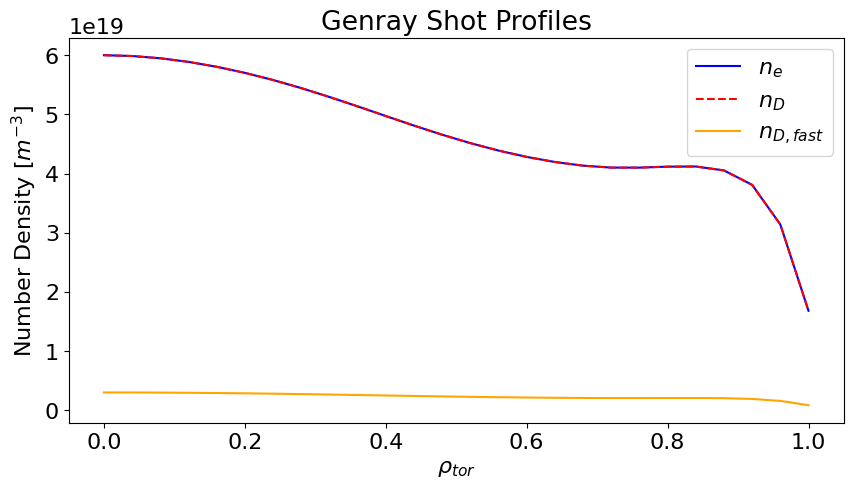

In [20]:
plt.rcParams.update({'font.size': 16})
dentab = gnr_nml['dentab']['prof']
den = np.array(dentab).reshape(26,3)
den_scale = gnr_nml['plasma']['den_scale']
ndens = gnr_nml['plasma']['ndens']
rgrid = np.linspace(0, 1, ndens)
ne = den[:,0]*den_scale[0]
nD = den[:,1]*den_scale[1]
nDfast = nD*fast_density_factor

plt.figure(figsize=(10,5))
plt.plot(rgrid, ne, label=r'$n_e$', color='blue')
plt.plot(rgrid, nD, label=r'$n_D$', color='red', linestyle='dashed')
plt.plot(rgrid, nDfast, label=r'$n_{D, fast}$', color='orange')
plt.legend()
plt.xlabel(r'$\rho_{tor}$')
plt.ylabel(r'Number Density [$m^{-3}$]')
plt.title('Genray Shot Profiles')


Text(0.5, 1.0, 'Genray Shot Profiles')

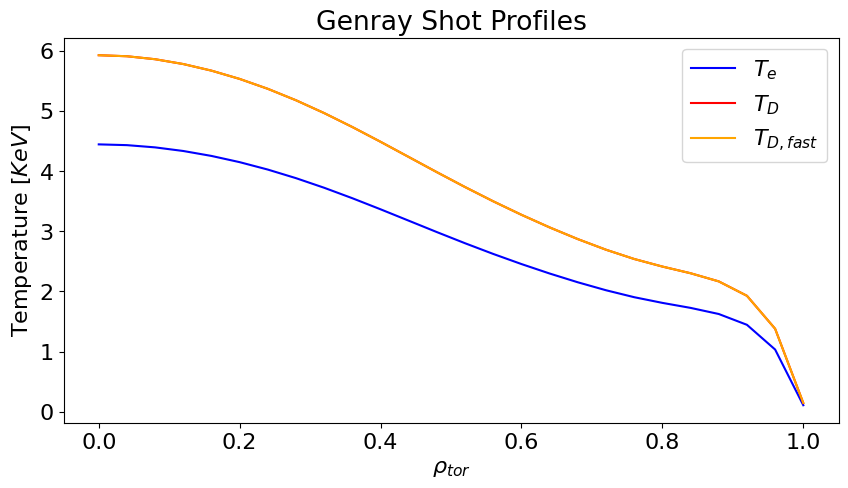

In [21]:
temtab = gnr_nml['temtab']['prof']
tem = np.array(temtab).reshape(26,3)
tem_scale = gnr_nml['plasma']['temp_scale']
ndens = gnr_nml['plasma']['ndens']
rgrid = np.linspace(0, 1, ndens)
Te = tem[:,0]*tem_scale[0]
TD = tem[:,1]*tem_scale[1]
TDfast = TD

plt.figure(figsize=(10,5))
plt.plot(rgrid, Te, label=r'$T_e$', color='blue')
plt.plot(rgrid, TD, label=r'$T_D$', color='red')
plt.plot(rgrid, TDfast, label=r'$T_{D, fast}$', color='orange')
plt.legend()
plt.xlabel(r'$\rho_{tor}$')
plt.ylabel(r'Temperature [$KeV$]')
plt.title('Genray Shot Profiles')

In [22]:
# here, I am going to try uploading the genray profiles and plotting. 
# testing 
aorsa_test2 = Aorsa_Analysis(rho_type='rho_tor')
aorsa_test2.local_work_dir = workdir
aorsa_test2.aorsa2din_template = 'aorsa2d.in'

# setting up directories
aorsa_test2.remote_work_dir = perlmutter_path_to_case
aorsa_test2.remote_host = host

# give file name with pol and corrisponding tor rho grid
aorsa_test2.rho_pol = 'rho_pol147634.txt' 
aorsa_test2.rho_tor = 'rho_tor147634.txt' 
# aorsa_test2.rho_pol = 'rho_pol174658.txt' 
# aorsa_test2.rho_tor = 'rho_tor174658.txt' 


# set up the species

# electrons
aorsa_test2.set_species(name='e', mass=9.11e-31, 
                        charge=-1.6022e-19, density=ne, temp=Te, rho=rgrid, ndisti=0)

# Fast Deuterium
aorsa_test2.set_species(name='Dfast', mass=3.3687870052e-027, 
                        charge=1.6022e-19, density=nDfast, temp=TDfast, rho=rgrid, ndisti=2)

# Bulk Deuterium
aorsa_test2.set_species(name='D', mass=3.3687870052e-027, 
                        charge=1.6022e-19, density=nD, temp=TD, rho=rgrid, ndisti=0)

print(aorsa_test2.species_charge)
print(aorsa_test2.species_mass)
print(aorsa_test2.species_list)
print(aorsa_test2.species_temp)
print(aorsa_test2.species_density)
print(aorsa_test2.species_rho)
aorsa_test2.load_template()
print(aorsa_test2.aorsa_nml.keys())

{'e': -1.6022e-19, 'Dfast': 1.6022e-19, 'D': 1.6022e-19}
{'e': 9.11e-31, 'Dfast': 3.3687870052e-27, 'D': 3.3687870052e-27}
['e', 'Dfast', 'D']
{'e': array([4.44281, 4.43003, 4.39292, 4.3328 , 4.25065, 4.1474 , 4.024  ,
       3.8814 , 3.72173, 3.54797, 3.36412, 3.1749 , 2.9853 , 2.79999,
       2.62237, 2.45457, 2.29738, 2.15171, 2.01948, 1.90409, 1.80979,
       1.72656, 1.62506, 1.44556, 1.03492, 0.10969]), 'Dfast': array([5.92375, 5.90671, 5.85723, 5.77706, 5.66753, 5.52987, 5.36534,
       5.17521, 4.96231, 4.73063, 4.48549, 4.2332 , 3.98039, 3.73332,
       3.49649, 3.27276, 3.06318, 2.86895, 2.69264, 2.53879, 2.41305,
       2.30208, 2.16674, 1.92741, 1.37989, 0.14625]), 'D': array([5.92375, 5.90671, 5.85723, 5.77706, 5.66753, 5.52987, 5.36534,
       5.17521, 4.96231, 4.73063, 4.48549, 4.2332 , 3.98039, 3.73332,
       3.49649, 3.27276, 3.06318, 2.86895, 2.69264, 2.53879, 2.41305,
       2.30208, 2.16674, 1.92741, 1.37989, 0.14625])}
{'e': array([6.00000000e+19, 5.98672506e+19, 

self.aorsa_nml[STATE][S_T_S] after zerowing: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

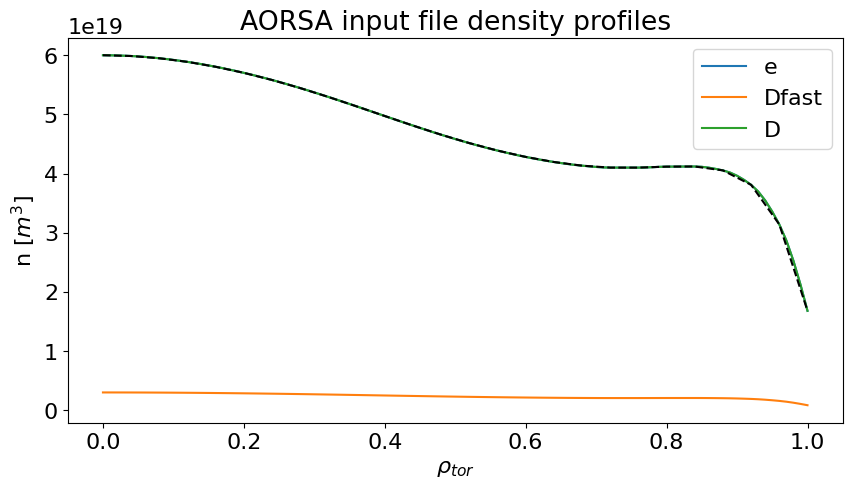

In [23]:
# Now, try writing the new species to the state and plotting the new stuff to see if it is genray-like
aorsa_test2.set_state()
aorsa_test2.plot_density()
plt.plot(rgrid, ne, 'k--')

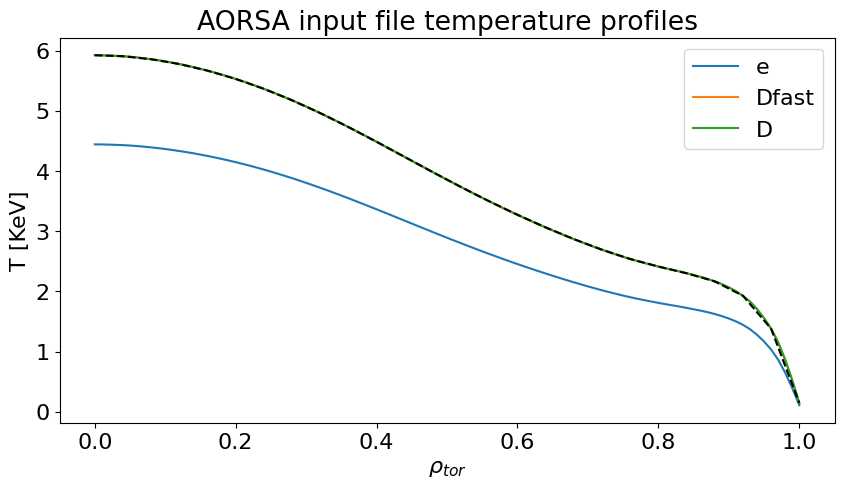

In [24]:
aorsa_test2.plot_temperature()
plt.plot(rgrid, TDfast, 'k--')


In [25]:
# things above look good. Now time to update the antenna, computational box, etc. 

# Save antenna properties
aorsa_test2.setup_antenna(power=.7e6, freq=96e6, nstrap=2, i_antenna=0, R=1.12, Z=0, straplength=0.4,
                      strapwidth=9.4e-2, dist_btwn_straps=24.4e-2, npi_array=-11, 
                      d_psi_ant=0.025, antlc=5, 
                      nphi_number=1, phase_array=[0., 180.0, 0., 180.0])

# Save computational box
aorsa_test2.setup_computational_box(psilim=0.999, ytop=1.07, ybottom=-1.26, rwright=2.317, 
                                rwleft=1.022, n_prof_flux=1, iprofile=5)

# Set up cluster solve 
aorsa_test2.setup_resolution_and_proc_grid(nmodesx=128, nmodesy=128, nprow=16, npcol=16, lmax=9, lmaxe=1)

# power absorption and non-maxwellian velocity grid: 
aorsa_test2.set_wdot_and_nonmax(enorm_factor=0.0, nuper=150, nupar=300, use_new_wdot=False,
                            nzeta_wdote=51, nzeta_wdoti=51)

# species setup 
aorsa_test2.species_specifications()

# noise control 
aorsa_test2.set_noise_control(z2_electron=1, upshift=1, xkperp_cutoff=0.5, damping=100.0, delta0=4.0e-05)


updating antenna perameters...


In [31]:
# things are looking good wow. Saving to file time! 
aorsa_test2.save_aorsa2d_out()

Saved aorsa namelist to /home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/aorsa2d_modified.in


In [29]:
# save and send to remote host
aorsa_test2.save_and_send_to_remote_host()

Saving changes to namelist.
Saved aorsa namelist to /home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/aorsa2d_modified.in
Done. Sending namelist aorsa2d_modified.in to:
perlmutter:~/aorsa3/aorsa/jacob_local/shots/DIIID147634/
scp /home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/aorsa2d_modified.in perlmutter:~/aorsa3/aorsa/jacob_local/shots/DIIID147634//aorsa2d_recieved.in
Done.


ssh: Could not resolve hostname perlmutter: Temporary failure in name resolution
lost connection


In [ ]:
S_NRHO_N = aorsa_test2.aorsa_nml['STATE']['S_NRHO_N']
S_RHO_N_GRID = aorsa_test2.aorsa_nml['STATE']['S_RHO_N_GRID']
S_N_S = aorsa_test2.aorsa_nml['STATE']['S_N_S']
S_S_NAME = aorsa_test2.aorsa_nml['STATE']['S_S_NAME']
print(S_S_NAME)
print(S_NRHO_N)
print(len(S_RHO_N_GRID))
print(len(S_N_S))

['e', 'D', 'Dfast']
101
181
967


In [1]:
#%history -g